In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import dlib
import os

In [2]:
print(os.listdir("/Users/sandeepmoparthy/Desktop/jffe"))

['MK.AN3.127.tiff', 'MK.NE1.113.tiff', 'YM.AN3.63.tiff', 'MK.SA1.119.tiff', 'KA.AN1.39.tiff', 'KA.SU2.37.tiff', 'YM.NE2.50.tiff', 'TM.HA2.181.tiff', 'NA.FE2.218.tiff', 'YM.NE3.51.tiff', 'MK.DI1.128.tiff', 'YM.AN2.62.tiff', 'KL.AN2.168.tiff', 'YM.HA2.53.tiff', 'NA.AN2.212.tiff', 'KM.SA5.13.tiff', 'UY.FE1.152.tiff', 'UY.AN2.147.tiff', 'KR.NE1.71.tiff', 'NA.HA3.204.tiff', 'KM.HA2.5.tiff', 'KA.FE1.45.tiff', 'KL.DI4.173.tiff', 'TM.SA1.184.tiff', 'KA.HA1.29.tiff', 'YM.DI3.66.tiff', 'TM.NE1.177.tiff', 'KR.HA2.75.tiff', 'UY.DI1.149.tiff', 'KL.SA1.161.tiff', 'KL.FE2.175.tiff', 'KM.SU3.16.tiff', 'KL.AN3.169.tiff', 'NA.AN3.213.tiff', 'YM.FE2.68.tiff', 'NA.FE3.219.tiff', 'KR.SU3.82.tiff', 'NM.AN3.106.tiff', 'UY.NE3.136.tiff', 'YM.FE3.69.tiff', 'NA.DI2.215.tiff', 'KA.NE1.26.tiff', 'KL.DI1.170.tiff', 'MK.AN2.126.tiff', 'TM.AN2.191.tiff', 'YM.FE4.70.tiff', 'KL.DI3.172.tiff', 'KM.DI1.20.tiff', 'NM.AN1.104.tiff', 'NM.FE2.111.tiff', 'UY.NE1.134.tiff', 'KL.SU2.165.tiff', 'MK.SA2.120.tiff', 'KM.FE1.23.tif

In [3]:
import os
filelist=os.listdir('/Users/sandeepmoparthy/Desktop/jffe')
for fichier in filelist:
    if (fichier.endswith(".DS_Store")):
        filelist.remove(fichier)
print(filelist)

['MK.AN3.127.tiff', 'MK.NE1.113.tiff', 'YM.AN3.63.tiff', 'MK.SA1.119.tiff', 'KA.AN1.39.tiff', 'KA.SU2.37.tiff', 'YM.NE2.50.tiff', 'TM.HA2.181.tiff', 'NA.FE2.218.tiff', 'YM.NE3.51.tiff', 'MK.DI1.128.tiff', 'YM.AN2.62.tiff', 'KL.AN2.168.tiff', 'YM.HA2.53.tiff', 'NA.AN2.212.tiff', 'KM.SA5.13.tiff', 'UY.FE1.152.tiff', 'UY.AN2.147.tiff', 'KR.NE1.71.tiff', 'NA.HA3.204.tiff', 'KM.HA2.5.tiff', 'KA.FE1.45.tiff', 'KL.DI4.173.tiff', 'TM.SA1.184.tiff', 'KA.HA1.29.tiff', 'YM.DI3.66.tiff', 'TM.NE1.177.tiff', 'KR.HA2.75.tiff', 'UY.DI1.149.tiff', 'KL.SA1.161.tiff', 'KL.FE2.175.tiff', 'KM.SU3.16.tiff', 'KL.AN3.169.tiff', 'NA.AN3.213.tiff', 'YM.FE2.68.tiff', 'NA.FE3.219.tiff', 'KR.SU3.82.tiff', 'NM.AN3.106.tiff', 'UY.NE3.136.tiff', 'YM.FE3.69.tiff', 'NA.DI2.215.tiff', 'KA.NE1.26.tiff', 'KL.DI1.170.tiff', 'MK.AN2.126.tiff', 'TM.AN2.191.tiff', 'YM.FE4.70.tiff', 'KL.DI3.172.tiff', 'KM.DI1.20.tiff', 'NM.AN1.104.tiff', 'NM.FE2.111.tiff', 'UY.NE1.134.tiff', 'KL.SU2.165.tiff', 'MK.SA2.120.tiff', 'KM.FE1.23.tif

In [4]:

from PIL import Image

jaffe_emotion_map = {'AN': 0, 'DI': 1, 'FE': 2, 'HA': 3,
           'SA': 4, 'SU': 5, 'NE': 6}

jaffe_imgs_dict = {'emotion':[], 'img':[]}
for root,dirs,files in os.walk('/Users/sandeepmoparthy/Desktop/jffe', topdown=True):
    for file in files:
        import os
        filelist=os.listdir('/Users/sandeepmoparthy/Desktop/jffe')
        for fichier in filelist:
            if (fichier.endswith(".DS_Store")):
                filelist.remove(fichier)
                print(filelist)
        img = Image.open(os.path.join(root,file)).convert('L')
        img_arr = np.asarray(img, dtype=np.float32)
        img_arr = img_arr.reshape(1, img_arr.shape[0], img_arr.shape[1])
        jaffe_imgs_dict['img'].append(img_arr)
        emotion_index = file.find('.') + 1
        emotion = file[emotion_index:emotion_index + 2]
        jaffe_imgs_dict['emotion'].append(jaffe_emotion_map[emotion])

jaffe_imgs_df = DataFrame.from_dict(jaffe_imgs_dict)
jaffe_imgs_df['org_dim'] = jaffe_imgs_df['img'].map(lambda x: x.shape)

In [5]:
jaffe_imgs_df = jaffe_imgs_df[['emotion','img','org_dim']]
all_imgs = pd.concat([ jaffe_imgs_df])

#create range(0, len(all_imgs)) index
all_imgs = all_imgs.reset_index()

print(len(all_imgs))

213


In [6]:
print(all_imgs['org_dim'].map(lambda x: x[1] == x[2]).value_counts())


True    213
Name: org_dim, dtype: int64


In [7]:
import dlib

detector = dlib.get_frontal_face_detector()

def face_detected(img):
    img_copy = img.copy()
    img_copy = img_copy.reshape(img_copy.shape[1], img_copy.shape[2]).astype(np.uint8)
    dets = detector(img_copy)
    
    if len(dets) > 0:
        return True
    else:
        return False

def crop(img):
    h, w = img.shape[1:]

    if h%2 != 0:
        img = img[:, 1:, :]
    if w%2 != 0:
        img = img[:, :, 1:]
    
    h, w = img.shape[1:]
    center = (int(h/2), int(w/2))
    if w > h:
        img = img[:,:,center[1]-center[0]:center[1]+center[0]]
    elif h > w:
        img = img[:,center[0]-center[1]:center[0]+center[1],:]
    elif h == w:
        return img
    return img

all_imgs['is_sqr'] = all_imgs['org_dim'].map(lambda x: x[1] == x[2])
all_imgs['img'] = all_imgs['img'].map(crop)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random

def scale_img(img, size=(96, 96)):
    img = img.reshape(img.shape[1], img.shape[2])
    pil_img = Image.fromarray(img)
    pil_img = pil_img.resize(size, resample=Image.LANCZOS)
    scaled_img = np.asarray(pil_img)
    scaled_img = scaled_img.reshape(1, scaled_img.shape[0], scaled_img.shape[1])
    return scaled_img

all_imgs['is_square'] = all_imgs['img'].map(lambda x: x.shape[1] == x.shape[2])

sqr_imgs = all_imgs[all_imgs['is_square'] == True]
print('sqr_imgs len: {}'.format(len(sqr_imgs)))

sqr_imgs['scaled_img'] = sqr_imgs['img'].map(lambda x: scale_img(x))

# sample = random.sample(sqr_imgs.index.tolist(), 10)

# fig = plt.figure()
# x = 1
# for i in sample:
#     img = sqr_imgs.iloc[i]['scaled_img']
#     img = img.reshape(img.shape[1], img.shape[2])
#     fig.add_subplot(5,2,x)
#     plt.imshow(img, cmap = plt.get_cmap('gray'))
#     x += 1

sqr_imgs len: 213


In [9]:
sqr_imgs['scaled_img2'] = sqr_imgs['img'].map(lambda x: scale_img(x, size=(192,192)))
print(sqr_imgs['scaled_img2'].head().map(lambda x: x.shape))


0    (1, 192, 192)
1    (1, 192, 192)
2    (1, 192, 192)
3    (1, 192, 192)
4    (1, 192, 192)
Name: scaled_img2, dtype: object


In [10]:
# create min max normalized column

from sklearn.preprocessing import MinMaxScaler

X = np.asarray(sqr_imgs['scaled_img2'].values.tolist())

X = X.reshape(len(X),36864)

print(X.shape)

min_max_scaler = MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)
sqr_imgs['normalized_img'] = [arr.reshape(1, 192, 192) for arr in X_min_max]

(213, 36864)


In [11]:
# create z normalized column

from sklearn.preprocessing import scale

X = np.asarray(sqr_imgs['scaled_img2'].values.tolist())

X = X.reshape(len(X),36864)

print(X.shape)

X_scaled = scale(X)
sqr_imgs['z_normalized_img'] = [arr.reshape(1, 192, 192) for arr in X_min_max]

(213, 36864)


/Users/sandeepmoparthy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/sandeepmoparthy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


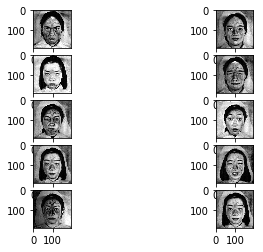

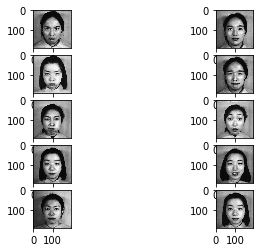

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

x = 1
fig1 = plt.figure()
for img in sqr_imgs['z_normalized_img'][:10]:
    img = img.reshape(192,192)
    fig1.add_subplot(5, 2, x)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    x += 1

x = 1
fig2 = plt.figure()
for img in sqr_imgs['scaled_img2'][:10]:
    img = img.reshape(192,192)
    fig2.add_subplot(5, 2, x)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    x += 1


In [13]:
import dlib

test = np.array([[1,1],[1,1]]).astype(np.uint8)
detector = dlib.get_frontal_face_detector()
dets = detector(test)
print(len(dets))
for i, d in enumerate(dets):
        print(d.left(), d.top(), d.right(), d.bottom())

0


In [14]:
detector = dlib.get_frontal_face_detector()

def face_detected(img):
    img_copy = img.copy()
    img_copy = img_copy.reshape(img_copy.shape[1], img_copy.shape[2]).astype(np.uint8)
    dets = detector(img_copy)
    
    if len(dets) > 0:
        return True
    else:
        return False

sqr_imgs['face_detected'] = sqr_imgs['scaled_img'].map(face_detected)
print(sqr_imgs['face_detected'].value_counts())

True     144
False     69
Name: face_detected, dtype: int64


[111, 166, 33, 163, 15, 94, 192, 59, 134, 160]


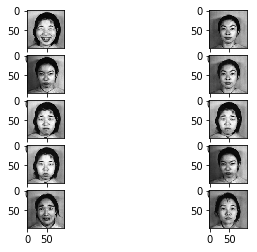

In [15]:
sample2 = random.sample(sqr_imgs[sqr_imgs['face_detected'] == False].index.tolist(), 10)
print(sample2)
fig = plt.figure()
x = 1
for i in sample2:
    fig.add_subplot(5, 2, x)
    img = sqr_imgs.iloc[i]['scaled_img'].reshape(96,96)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    x += 1

# Split into training and test sets¶


In [16]:
emo = ['Angry', 'Disgust', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']
print(sqr_imgs['emotion'].value_counts().apply(lambda x: x/len(sqr_imgs)*100))

2    15.023474
4    14.553991
3    14.553991
6    14.084507
5    14.084507
0    14.084507
1    13.615023
Name: emotion, dtype: float64


#### Disgust only makes up 2% of the dataset, so it will be merged into Anger

In [17]:
#remap emotions so they range 0-5
'''
Current emotion map:
emotion_map = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
'''
def remap(x):
    map = {0:0, 1:0, 2:1, 3:2, 4:3, 5:4, 6:5}
    return map[x]

sqr_imgs['emotion'] = sqr_imgs['emotion'].map(remap)

print(sqr_imgs['emotion'].value_counts().apply(lambda x: x/len(sqr_imgs)*100))

0    27.699531
1    15.023474
3    14.553991
2    14.553991
5    14.084507
4    14.084507
Name: emotion, dtype: float64


#### Split into train, cv, test (60%, 20%, 20%)

In [18]:
from sklearn.model_selection import train_test_split

dlib_dataset = sqr_imgs[sqr_imgs['face_detected'] == True][['normalized_img','emotion']]

X = np.array(dlib_dataset['normalized_img'].values.tolist())
y = np.array(dlib_dataset['emotion'].values.tolist())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
#create cross validation set
print('Training Set:\nX: {}\ny: {}\n'.format(len(X_train), len(y_train)))
print('Test Set:\nX: {}\ny: {}\n'.format(len(X_test), len(y_test)))

dlib_dataset = sqr_imgs[sqr_imgs['face_detected'] == True][['normalized_img','emotion']]

X = np.array(dlib_dataset['normalized_img'].values.tolist())
y = np.array(dlib_dataset['emotion'].values.tolist())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
#create cross validation set
print('Training Set:\nX: {}\ny: {}\n'.format(len(X_train), len(y_train)))
print('Test Set:\nX: {}\ny: {}\n'.format(len(X_test), len(y_test)))

Training Set:
X: 100
y: 100

Test Set:
X: 44
y: 44

Training Set:
X: 100
y: 100

Test Set:
X: 44
y: 44



####  Convert to categorical arrays, and save to file

In [19]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print('X:')
print(X_train.shape, X_test.shape)
print('Y:')
print(Y_train.shape, Y_test.shape)

#np.save('../data/X_train_scaled_jaffe_ck_dlib', X_train)
#np.save('../data/Y_train_scaled_jaffe_ck_dlib', Y_train)
#np.save('../data/X_test_scaled_jaffe_ck_dlib', X_test)
#np.save('../data/Y_test_scaled_jaffe_ck_dlib', Y_test)

Using TensorFlow backend.


X:
(100, 1, 192, 192) (44, 1, 192, 192)
Y:
(100, 6) (44, 6)


In [20]:
X_train_fname = X_train
Y_train_fname = Y_train
X_train_test = np.array(X_train_fname)
Y_train_test = np.array(Y_train_fname)

print([np.sum(Y_train_test[:,i])/Y_train_test.shape[0] for i in range(0,6)])

[0.3, 0.17, 0.11, 0.14, 0.16, 0.12]


In [21]:
X_train_test

array([[[[0.5783545 , 0.56179327, 0.586526  , ..., 0.24502563,
          0.22487885, 0.14272135],
         [0.5682699 , 0.5990574 , 0.55372065, ..., 0.20680815,
          0.20172584, 0.16446245],
         [0.5613254 , 0.6419814 , 0.5979674 , ..., 0.15100539,
          0.19592106, 0.18246734],
         ...,
         [0.4268587 , 0.5063698 , 0.4543163 , ..., 0.35650867,
          0.29146326, 0.3241608 ],
         [0.4874723 , 0.5359144 , 0.4935705 , ..., 0.315665  ,
          0.35862142, 0.32419622],
         [0.5312563 , 0.57881206, 0.4911731 , ..., 0.35056114,
          0.39935434, 0.405252  ]]],


       [[[0.58981526, 0.5503025 , 0.56302285, ..., 0.17629254,
          0.08698201, 0.12288469],
         [0.6001334 , 0.5734564 , 0.5911338 , ..., 0.13351166,
          0.13071257, 0.14624256],
         [0.5911209 , 0.6406818 , 0.5825656 , ..., 0.16026443,
          0.20285147, 0.11189604],
         ...,
         [0.49969903, 0.499266  , 0.50765914, ..., 0.3207739 ,
          0.2661801 , 0

In [22]:
img

array([[ 99.43574 , 102.35809 , 103.543564, ..., 111.85134 , 108.174324,
        106.47941 ],
       [104.6035  , 102.079475, 104.05529 , ..., 112.282616, 105.90359 ,
        106.59947 ],
       [106.47469 , 104.85245 , 108.73807 , ..., 109.58886 , 103.14751 ,
        105.96122 ],
       ...,
       [ 62.24899 ,  61.61482 ,  57.37168 , ..., 131.42178 , 133.89935 ,
        129.60027 ],
       [ 55.992115,  53.61659 ,  53.179794, ..., 128.26741 , 129.43607 ,
        131.17287 ],
       [ 51.511337,  50.673332,  48.411278, ..., 131.55586 , 127.46027 ,
        128.80649 ]], dtype=float32)

#### Create dataset using keras image generator

In [23]:
#import numpy as np

#X_train_test = np.arange(36864).reshape(1,192,192,3)

#Y_train_test = X_train_test.reshape((X_train_test.shape[0]*0, 192, 192))

print(X_train_test.shape)

(100, 1, 192, 192)


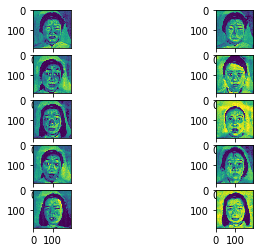

In [24]:
fig = plt.figure()
x = 1
for img in X_train_test[:10]:
    img = img.reshape(192,192)
    fig.add_subplot(5, 2, x)
    plt.imshow(img)
    x += 1

In [25]:

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_dim_ordering('th')
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             shear_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

datagen.fit(X_train)
print(datagen.flow(X_train, Y_train, batch_size=50000).next()[0].shape)

(100, 1, 192, 192)


## results

In [26]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import DataFrame, Series
import random
import numpy as np
from keras import backend as K
K.set_image_dim_ordering('th')
print('Building model...')
model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(1, 192, 192)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(.25))

# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# #model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, verbose=1, shuffle=True)
# model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
#                     steps_per_epoch=len(X_train)/32, epochs=320)



Building model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 192, 192)      832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 192, 192)      25632     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 192, 192)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 96, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 96, 96)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 96, 96)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 96, 96)        369

In [33]:
 model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=len(X_train)/32, epochs=320) 
#model.fit_generator(datagen.flow(X_train, Y_train, batch_size=5),
#                    steps_per_epoch=len(X_train)/5, epochs=10)

Epoch 1/320
4/3 [======================================] - 160s 40s/step - loss: 1.7448 - acc: 0.3267
Epoch 2/320
4/3 [======================================] - 138s 34s/step - loss: 1.7716 - acc: 0.2830
Epoch 3/320
4/3 [======================================] - 139s 35s/step - loss: 1.7484 - acc: 0.2913
Epoch 4/320
4/3 [======================================] - 137s 34s/step - loss: 1.7094 - acc: 0.3350
Epoch 5/320
4/3 [======================================] - 139s 35s/step - loss: 1.7482 - acc: 0.2747
Epoch 6/320
4/3 [======================================] - 138s 35s/step - loss: 1.7229 - acc: 0.3788
Epoch 7/320
4/3 [======================================] - 137s 34s/step - loss: 1.7205 - acc: 0.2913
Epoch 8/320
4/3 [======================================] - 136s 34s/step - loss: 1.7241 - acc: 0.3350
Epoch 9/320
4/3 [======================================] - 136s 34s/step - loss: 1.7509 - acc: 0.2913
Epoch 10/320
4/3 [======================================] - 143s 36s/step - loss: 

KeyboardInterrupt: 

In [34]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm



In [35]:
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
#neurons = [1, 5, 10, 15, 20, 25, 30]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']


In [36]:
##############################################################
# grid search epochs, batch size
epochs = [1, 10] # add 50, 100, 150 etc
batch_size = [1000, 5000] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)
##############################################################


In [37]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train) 

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.models.Sequential object at 0x13fcb6e80> does not.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
param_grid = dict(epochs=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

In [39]:
# serialize model to JSON
model_json = model.to_json()
with open("model_3.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("weights_3.h5")
print("Saved model to disk")

<bound method NDFrame.head of Empty DataFrame
Columns: [X_train_fname, Y_train_fname, acc, dropout, epochs, loss, model_id, val_acc, val_loss]
Index: []>